## Libraries

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'pandas.table'

In [2]:
df = pd.read_csv('../data/processed/road_accidents_czechia_2016_2022.csv')

In [24]:
main = ['id','communication_kind','date','time','accident_kind','crash_kind',
        'fixed_precaution_kind','cause_of_accident','main_cause_of_accident']

consequences = ['id','injury','killed_persons','severely_injured_persons','slightly_injured_persons','total_material_damage',
                'vehicle_sequel','damage_to_the_vehicle(in_hundred_crowns)','leakage_of_transported_materials','way_of_releasing_persons_from_the_vehicle']

place = ['id','city','street','road_type','location','directional_rates']


driver_characteristic = ['id','alcohol','driver_category','driver_condition','driver_external_influence']

car_characteristic = ['id','vehicle_type','vehicle_brand','year_of_manufacture','vehicle_owner']


weather_and_road_condition = ['id','weather_conditions_at_the_time_of_accident','visibility','condition_of_vehicle_surface',
                              'condition_of_communication','road_surface_type','traffic_control_at_the_time_of_an_accident']


In [4]:
df.dtypes

id                                                                 int64
communication_kind                                                object
date                                                              object
time                                                             float64
accident_kind                                                     object
crash_kind                                                        object
fixed_precaution_kind                                             object
injury                                                           float64
cause_of_accident                                                 object
alcohol                                                           object
main_cause_of_accident                                            object
killed_persons                                                   float64
severely_injured_persons                                         float64
slightly_injured_persons                           

In [5]:
df.head(3)

,id,communication_kind,date,time,accident_kind,crash_kind,fixed_precaution_kind,injury,cause_of_accident,alcohol,...,way_of_releasing_persons_from_the_vehicle,direction_of_movement,damage_to_the_vehicle(in_hundred_crowns),driver_category,driver_condition,driver_external_influence,city,street,road_type,location
0,31017220679,Class 1 roads,2022-11-24,1954.0,collision with a fixed obstacle,not an option It is not a collision between mo...,"wall, fixed part of bridges, underpasses, tunn...",0.0,driver of a motor vehicle,ne,...,there was no need to use violence,moving vehicle - in the measure of stationary ...,200.0,with a driving licence of category B,good no adverse circumstances were found,the driver was not affected,TRSTĚNICE,NaN,1st class roads,outside the village
1,31017220700,Class 1 roads,2022-11-24,1954.0,collision with a moving non-rail vehicle,Side,not an option not a collision with a fixed obs...,0.0,driver of a motor vehicle,ne,...,there was no need to use violence,moving vehicle - in the measure of stationary ...,1000.0,with a driving licence of category B,good no adverse circumstances were found,the driver was not affected,CHODOVÁ PLANÁ,NaN,1st class roads,outside the village
2,190206220001,3rd class roads,2022-01-01,530.0,crashes,not an option It is not a collision between mo...,not an option not a collision with a fixed obs...,1.0,driver of a motor vehicle,yes blood alcohol content between 1.0 ‰ and 1.5 ‰,...,there was no need to use violence,vehicle moving - against the direction of stat...,400.0,with a driving licence of category C,"under the influence of alcohol, blood alcohol ...",other influences,NaN,NaN,class 3 roads,outside the village


In [6]:
df['date'] = pd.to_datetime(df['date'])

# General Information

In [7]:
cons = df[consequences].copy()
cons['date'] = df['date'].dt.year

<Axes: xlabel='date'>

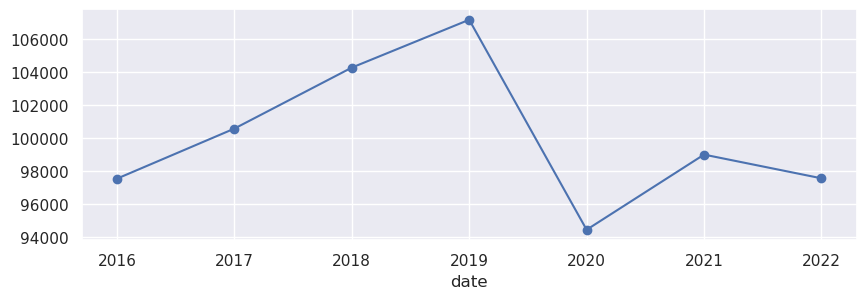

In [8]:
cons.groupby('date')['id'].count().plot(figsize=(10,3),marker='o')

In [9]:
grouped = cons.groupby('date')[['killed_persons','severely_injured_persons','slightly_injured_persons']].sum()

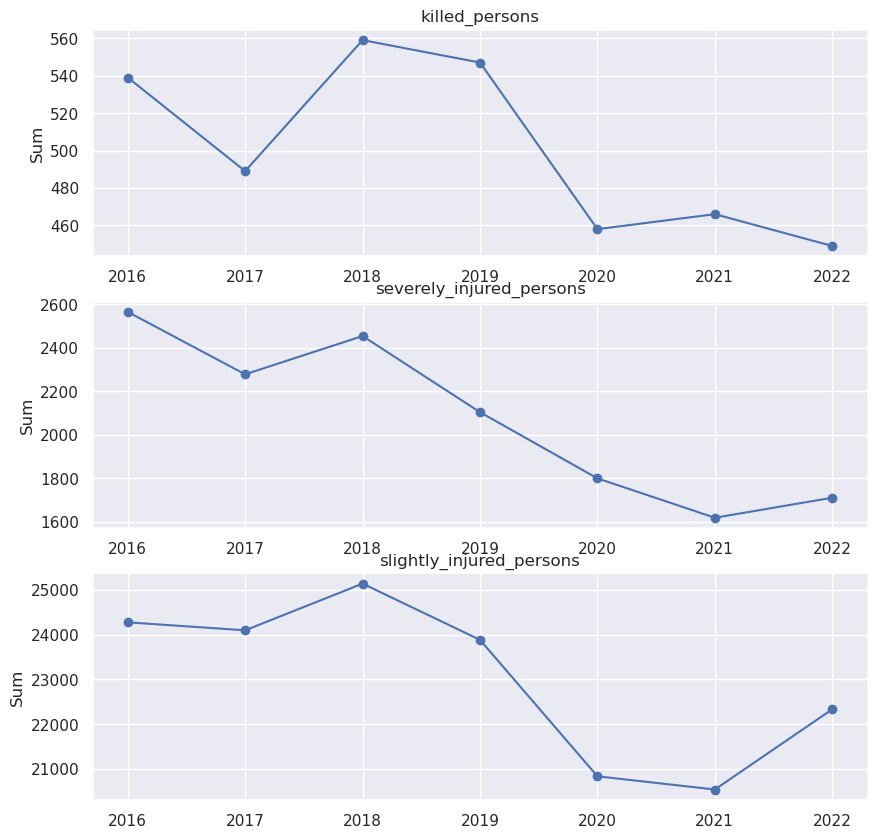

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
for i,col in enumerate(grouped.columns):
  axes[i].plot(grouped.index, grouped[col], label=col, marker='o')
  axes[i].set_title(col)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('Sum')

# Why?

In [25]:
main = df[main].copy()

### Main reason of accident

In [26]:
main['main_cause_of_accident'].value_counts().head(7)

main_cause_of_accident
the driver was not fully engaged in driving the vehicle                                117775
not caused by the driver                                                               108355
incorrect turning or reversing                                                          60030
another type of wrong way of driving                                                    57077
failure to keep a safe distance behind the vehicle                                      47726
Failure to adjust speed to road conditions (ice, potholes, mud, wet surfaces, etc.)     42020
failure to control the vehicle                                                          39123
Name: count, dtype: int64

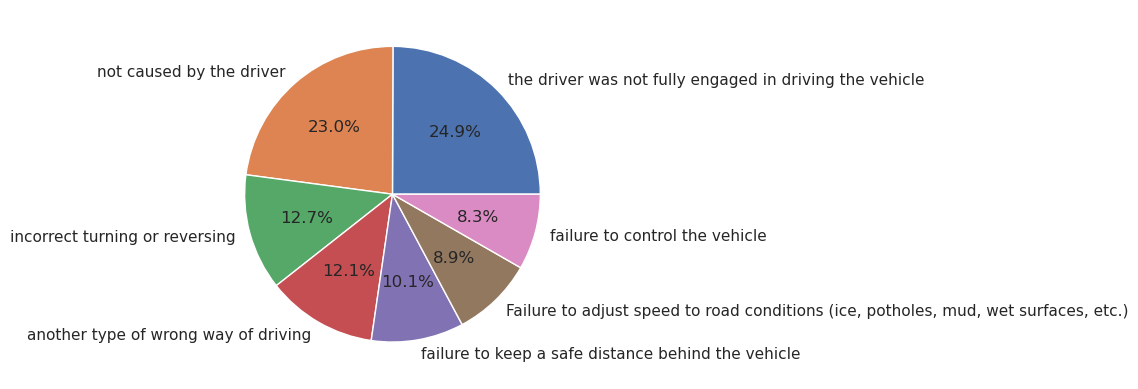

In [27]:
main['main_cause_of_accident'].value_counts(normalize=True).head(7).plot(kind='pie',ylabel='',autopct='%1.1f%%')
plt.savefig('../src/visualization/main_cause_of_accident.png')

### Type of accident

In [28]:
main['accident_kind'].value_counts()

accident_kind
collision with a moving non-rail vehicle    224165
collision with a vehicle parked, parked     153275
collision with a fixed obstacle             147434
collision with forest animals                92632
crashes                                      37128
collision with a pedestrian                  21239
another type of accident                     16832
collision with a tram                         3849
collision with a domestic animal              3144
collision with a train                         991
Name: count, dtype: int64

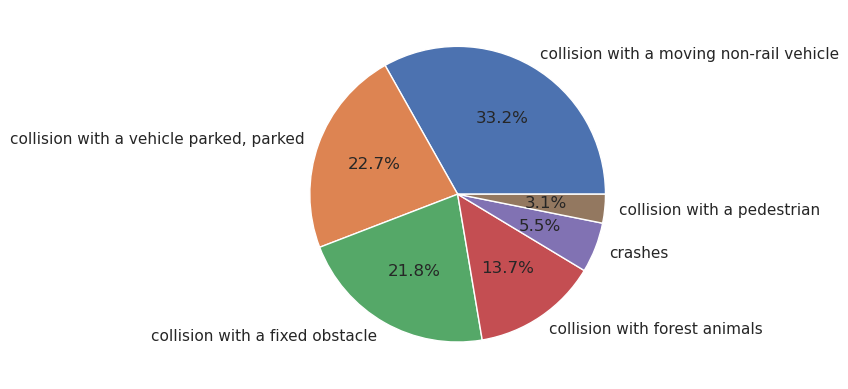

In [29]:
main['accident_kind'].value_counts(normalize=True).head(6).plot(kind='pie',ylabel='',autopct='%1.1f%%')
plt.savefig('../src/visualization/accident_kind.png')

### Type of Obstacle

In [16]:
main['fixed_precaution_kind'].value_counts(normalize=True).head()

fixed_precaution_kind
not an option not a collision with a fixed obstacle                   0.789587
other obstacle (railing, fence, embankment, boarding island, etc.)    0.061465
reflector, bollard, directional post, traffic sign post, etc.         0.038860
telephone, lighting, power lines, signalling, etc.                    0.028104
lever                                                                 0.026876
Name: proportion, dtype: float64

<Axes: >

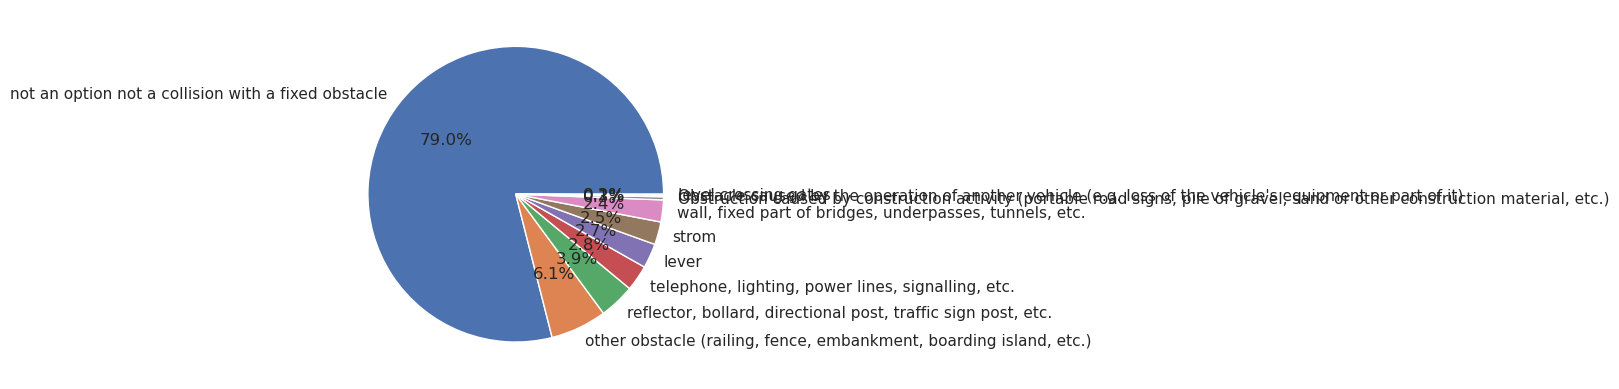

In [21]:
exclude = main['fixed_precaution_kind'].value_counts().head(1).reset_index()
main[~main['fixed_precaution_kind'].isin(exclude.index)]['fixed_precaution_kind']\
    .value_counts(normalize=True).plot(kind='pie',ylabel='',autopct='%1.1f%%')
plt.savefig('../src/visualization/fixed_precaution_kind.png')

# Who?

In [30]:
who = df[driver_characteristic+car_characteristic].copy()
who.isna().mean()

id                           0.000000
alcohol                      0.000637
driver_category              0.000668
driver_condition             0.039768
driver_external_influence    0.029525
id                           0.000000
vehicle_type                 0.002059
vehicle_brand                0.037218
year_of_manufacture          0.000000
vehicle_owner                0.005570
dtype: float64

In [31]:
who['driver_category'].value_counts(normalize=True,dropna=False)

driver_category
with a driving licence of category B                                            0.526293
with a driving licence of category C                                            0.179229
undetected, driver drove off                                                    0.175076
with a driving licence of category D                                            0.041884
other vehicle drivers (e.g. cyclists, car drivers, train drivers, etc.)         0.031135
not detected, the driver left the scene (code 17 for p44 or code 4 for p50a)    0.028830
without a driving licence                                                       0.010829
not detected (e.g. for foreigners)                                              0.003060
with a driving licence of category A                                            0.002275
NaN                                                                             0.000668
with a driving licence of group T                                               0.000415
with 

In [32]:
who['vehicle_owner'].value_counts(normalize=True,dropna=False)

vehicle_owner
private not used for profitable activities                         0.518377
private organization (entrepreneur, s.r.o., v.o.s., a.s., etc.)    0.216799
undetected, driver drove off                                       0.175076
registered outside the Czech Republic                              0.036483
privately used for gainful employment                              0.016999
public transport                                                   0.010124
Police of the Czech Republic                                       0.009708
NaN                                                                0.005570
state enterprise, state organisation                               0.003371
TAXI                                                               0.002301
Ministry of the Interior                                           0.001684
municipal, municipal police                                        0.000925
international truck transport                                      0.00069

In [33]:
who['vehicle_type'].value_counts(normalize=True,dropna=False)

vehicle_type
passenger car without trailer                                                 0.622420
undetected, driver drove off                                                  0.175076
truck (including multi-car, crane, tanker, etc.)                              0.083836
truck with trailer                                                            0.040466
bicycle                                                                       0.027473
motorcycle (including sidecars, scooters, etc.)                               0.018572
bus                                                                           0.014600
passenger car with trailer                                                    0.005764
tractor (with trailer)                                                        0.003358
other motor vehicle (agricultural, forestry, construction machinery, etc.)    0.002362
Tram                                                                          0.002132
NaN                           

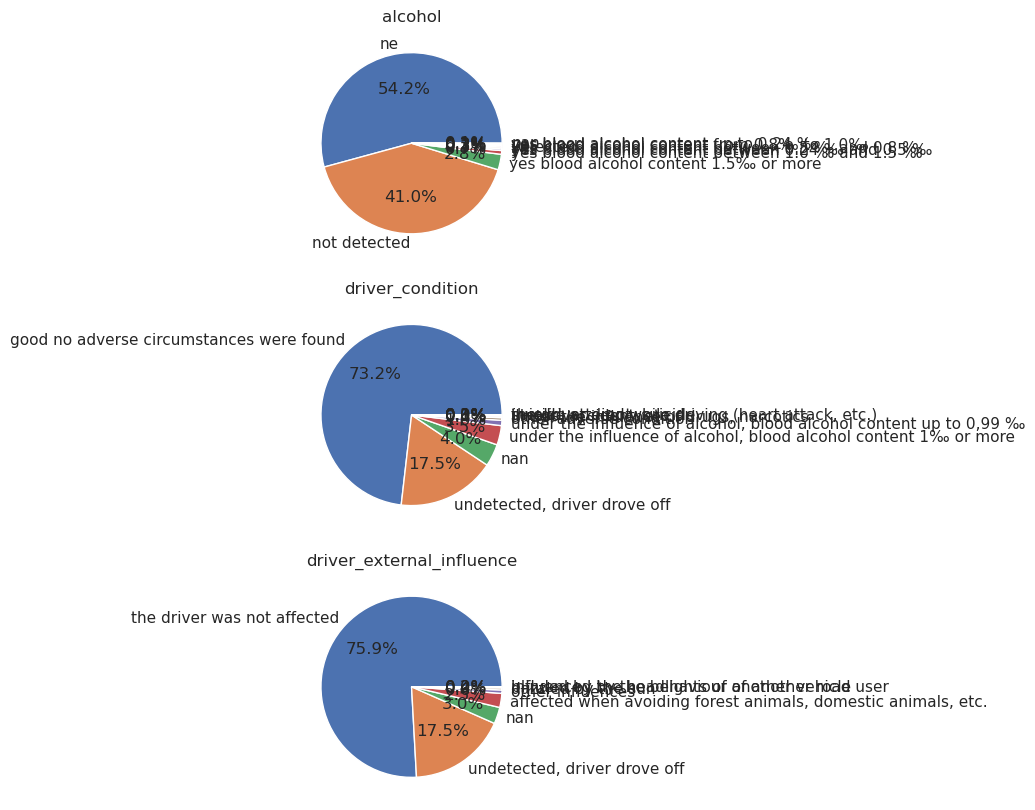

<Figure size 640x480 with 0 Axes>

In [38]:
vliv = ['alcohol','driver_condition','driver_external_influence']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(3, 10))

for i,col in enumerate(vliv):
  t = who[col].value_counts(normalize=True,dropna=False)
  axes[i].pie(t,labels=t.index, autopct='%1.1f%%')
  axes[i].set_title(col)
plt.show();
plt.savefig(f'../src/visualization/driver_affect.png')  

Well, you can see that nothing affects the driver, only in rare cases, you can say it's emissions.   

In [39]:
def year(row):
  if row in range(2010,2021):
    return '2010-2020'
  elif row in range(2000,2011):
    return '2000-2010'
  elif row in range(1990,2001):
    return '1990-2000'
  elif row == -1:
    return np.nan
  else:
    return '<1990'

In [40]:
who['year_of_manufacture'].apply(year).value_counts(normalize=True,dropna=False)

year_of_manufacture
2010-2020    0.398468
2000-2010    0.275211
NaN          0.218451
1990-2000    0.062036
<1990        0.045835
Name: proportion, dtype: float64

In [41]:
who['vehicle_brand'] = who['vehicle_brand'].str.title()
df['vehicle_brand'] = who['vehicle_brand']

In [42]:
who['vehicle_brand'].value_counts(normalize=True,dropna=False).head(10)

vehicle_brand
Škoda                           0.207419
Undetected, Driver Drove Off    0.175076
Volkswagen                      0.078323
Ford                            0.052925
Renault                         0.039637
Mercedes                        0.038171
NaN                             0.037218
Peugeot                         0.037044
Bmw Motorcycles                 0.025082
Hyundai                         0.024317
Name: proportion, dtype: float64

# Where?

In [43]:
where = df[place].copy()
where.isna().mean()

id                   0.000000
city                 0.318742
street               0.441958
road_type            0.000000
location             0.000000
directional_rates    0.000000
dtype: float64

In [44]:
where.loc[where['city'].notna(),'city'] = where['city'].str.title()
where.loc[where['street'].notna(),'street'] = where['street'].str.title()

## City

In [45]:
where['city'].value_counts(normalize=True).head()

city
Brno             0.035391
Olomouc          0.014149
Liberec          0.013294
Hradeckrálové    0.012548
Praha4           0.011671
Name: proportion, dtype: float64

In [46]:
def praha(row):
  if type(row) != float and 'Praha' in row:
    return 'Praha'
  return row
top_city = where['city'].apply(praha).value_counts(normalize=True,dropna=False)

In [47]:
top_city.head(10)

city
NaN                0.318742
Praha              0.196919
Brno               0.024111
Olomouc            0.009639
Liberec            0.009057
Hradeckrálové      0.008549
Českébudějovice    0.006648
Pardubice          0.006536
Teplice            0.006051
Zlín               0.005750
Name: proportion, dtype: float64

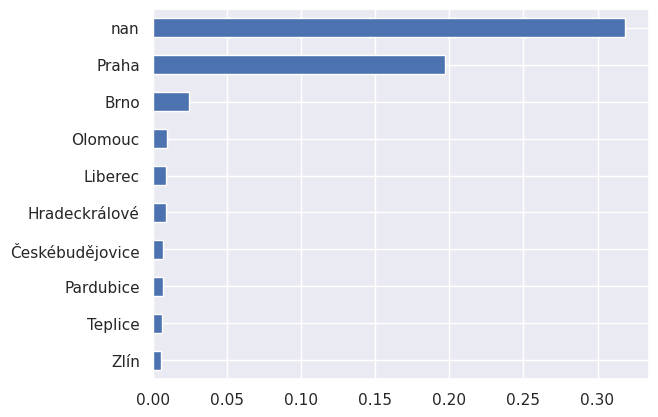

In [56]:
top_city.head(10).sort_values(ascending=True).plot(kind='barh',ylabel='')
plt.savefig(f'../src/visualization/city_distribution.png')  

## street

In [57]:
where[['city','street']].value_counts(normalize=True,dropna=False).head(6)

city            street      
NaN             NaN             0.318642
Praha           NaN             0.001246
Praha5          Pražskýokruh    0.000881
Praha9Vysočany  Kbelská         0.000881
Praha6Břevnov   Bělohorská      0.000876
Poruba          Opavská         0.000741
Name: proportion, dtype: float64

Of course we cannot draw any special conclusions because more than a third of the values are unknown to us, but Opawska street in Poruba is out of the mass.

In [68]:
df['main_cause_of_accident'].value_counts(normalize=True).head()

main_cause_of_accident
the driver was not fully engaged in driving the vehicle    0.168085
not caused by the driver                                   0.154641
incorrect turning or reversing                             0.085673
another type of wrong way of driving                       0.081458
failure to keep a safe distance behind the vehicle         0.068113
Name: proportion, dtype: float64

In [69]:
df[(df['city'] == "Poruba") & (df['street'] == "Opavská")]\
  [['crash_kind','main_cause_of_accident']]\
  .value_counts(normalize=True,dropna=True).head()

crash_kind                                                   main_cause_of_accident          
not an option It is not a collision between moving vehicles  pedestrians at a marked crossing    1.0
Name: proportion, dtype: float64

Водители постоянно сталкиваются из за нехватки расстояния между ними

## Type of road

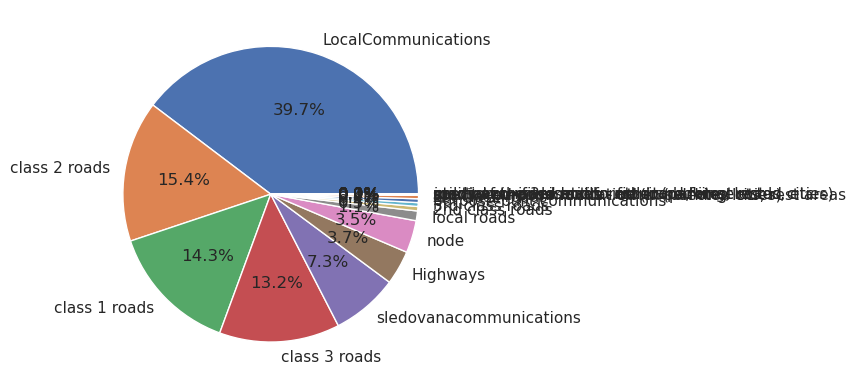

In [74]:
where['road_type'].value_counts(normalize=True).plot(kind='pie',ylabel='',autopct='%1.1f%%')
plt.savefig(f'../src/visualization/road_type.png')  

In [75]:
where[where['city'].isna()]['road_type'].value_counts()

road_type
class 2 roads              65349
class 1 roads              64400
class 3 roads              51336
Highways                   24371
LocalCommunications        17807
sledovanacommunications       51
node                          16
1st class roads                3
3rd class roads                3
2nd class roads                2
local roads                    1
Name: count, dtype: int64

In [76]:
where[where['city'].isna()]['location'].value_counts(normalize=True)

location
outside the village    0.989841
in the village         0.010159
Name: proportion, dtype: float64

52.5 percent of the city's unknown values are accidents outside the city limits

In [77]:
where['city'] = where['city'].fillna('outside the municipality')
df['city'] = where['city']

In [78]:
df['city'].isna().mean()

0.0

In [79]:
where[where['street'].isna()]['location'].value_counts(normalize=True)

location
outside the village    0.738022
in the village         0.261978
Name: proportion, dtype: float64

In [83]:
where.loc[(where['street'].isna()) & (where['location'] == 'outside the municipality'),'street'] = 'outside the municipality'
where[where['location'] == 'outside the municipality'].head()

,id,city,street,road_type,location,directional_rates


In [84]:
df['street'] = where['street']
df['street'].isna().mean()

0.4419578443503466

# When?

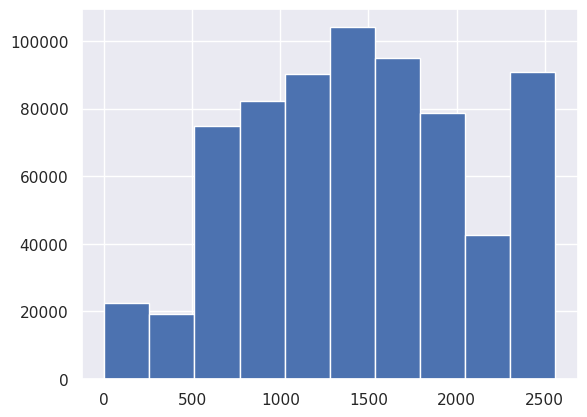

In [87]:
df['time'].hist()
plt.savefig(f'../src/visualization/time_distribution.png')  

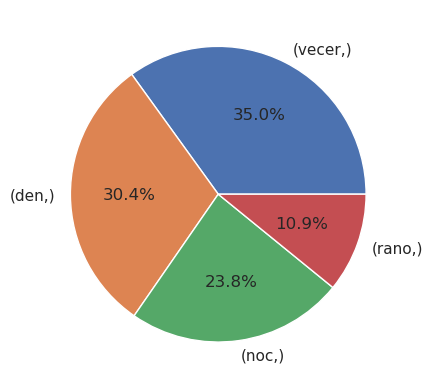

In [88]:
# There are values from 0 to 2560, so the only sure solution is to divide into 4 equal parts
pd.DataFrame(pd.cut(df['time'],4,labels=['rano','den','vecer','noc']))\
  .value_counts(normalize=True).plot(kind='pie',ylabel='',autopct='%1.1f%%')
plt.savefig(f'../src/visualization/time_of_day.png')  

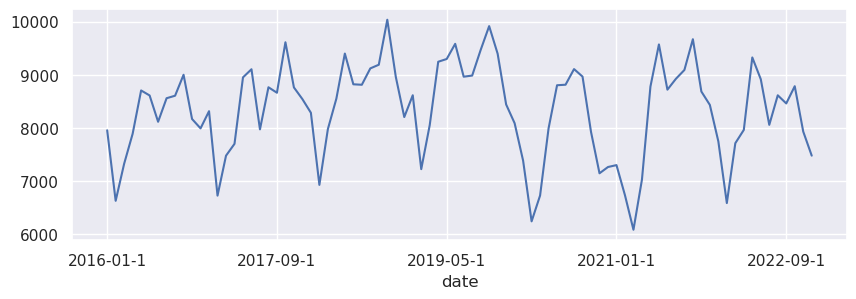

In [96]:
df.groupby(df['date'].dt.strftime('%Y-%m-1'))['id'].count().plot(figsize=(10,3))
plt.savefig(f'../src/visualization/month_distribution.png')  

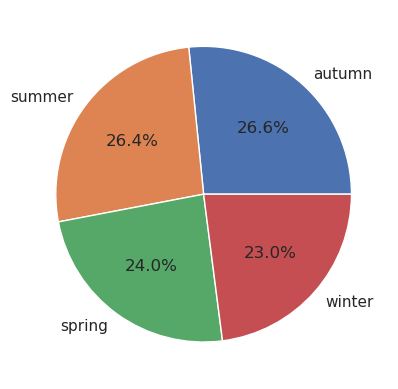

In [97]:
def obdobi(row):
  obdobi = {'winter':(12,1,2),'spring':(3,4,5),'summer':(6,7,8),'autumn':(9,10,11)}
  for i in obdobi.keys():
    if row.month in obdobi[i]:
      return i
df['date'].apply(obdobi).value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',ylabel='')
plt.savefig(f'../src/visualization/time_of_year.png')  

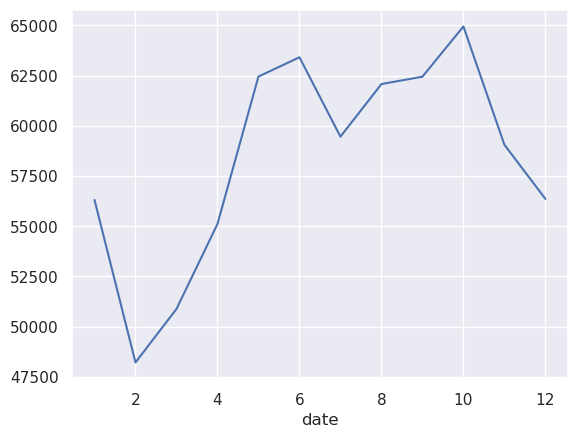

In [98]:
df.groupby(df['date'].dt.month)['id'].count().plot()
plt.savefig(f'../src/visualization/general_month_distribution.png')  

In [99]:
df[df['date'].dt.month.isin([6,7,8])]['main_cause_of_accident'].value_counts(normalize=True,dropna=False).head()

main_cause_of_accident
the driver was not fully engaged in driving the vehicle    0.179401
not caused by the driver                                   0.146054
incorrect turning or reversing                             0.086521
another type of wrong way of driving                       0.079470
failure to keep a safe distance behind the vehicle         0.067763
Name: proportion, dtype: float64

In [100]:
df[df['date'].dt.month.isin([12,1,2])]['main_cause_of_accident'].value_counts(normalize=True,dropna=False).head()

main_cause_of_accident
the driver was not fully engaged in driving the vehicle                                0.154536
not caused by the driver                                                               0.140401
Failure to adjust speed to road conditions (ice, potholes, mud, wet surfaces, etc.)    0.135292
incorrect turning or reversing                                                         0.083241
another type of wrong way of driving                                                   0.080742
Name: proportion, dtype: float64

We can see that almost 14% of cases are caused by weather conditions, but because people travel less often in winter => weather has almost no influence.

# Weather impact


In [101]:
weather = df[weather_and_road_condition].copy()

In [102]:
weather.head(3)

,id,weather_conditions_at_the_time_of_accident,visibility,condition_of_vehicle_surface,condition_of_communication,road_surface_type,traffic_control_at_the_time_of_an_accident
0,31017220679,unencumbered,"at night without public lighting, visibility n...",surface wet,longitudinal slope greater than 8 '%,resins,no traffic control method
1,31017220700,unencumbered,"at night without public lighting, visibility n...",surface wet,"good, without defects",NaN,no traffic control method
2,190206220001,"at the beginning of rain, light rain, drizzle,...","at night without public lighting, visibility n...",surface wet,longitudinal slope greater than 8 '%,resins,no traffic control method


In [103]:
weather['date'] = df['date']

In [104]:
weather['period'] = weather['date'].apply(obdobi)

<Axes: >

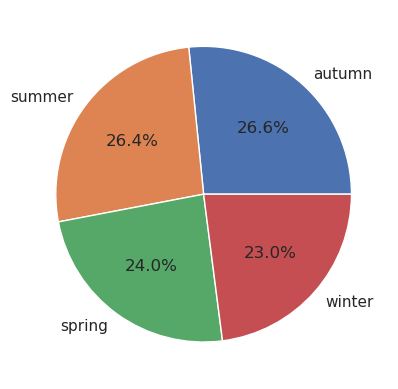

In [105]:
weather['period'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',ylabel='')

In [106]:
weather.groupby('period')['weather_conditions_at_the_time_of_accident'].value_counts(normalize=True)

period  weather_conditions_at_the_time_of_accident         
autumn  unencumbered                                           0.870646
        Rain                                                   0.053912
        at the beginning of rain, light rain, drizzle, etc.    0.044268
        mlha                                                   0.018055
        snowfall                                               0.005750
        frost and ice form                                     0.003186
        other difficult                                        0.002532
        gusty winds (crosswind, gale, etc.)                    0.001652
spring  unencumbered                                           0.916198
        Rain                                                   0.039072
        at the beginning of rain, light rain, drizzle, etc.    0.028439
        snowfall                                               0.008621
        frost and ice form                                     0.002595
    

In [107]:
weather.groupby('period')['visibility'].value_counts(normalize=True)

period  visibility                                                                                          
autumn  Daytime visibility not impaired by weather conditions                                                   0.610425
        at night with public lighting, visibility not impaired by weather conditions                            0.137732
        at night without public lighting, visibility not impaired by weather conditions                         0.129767
        reduced visibility during the day (dawn, dusk)                                                          0.057060
        reduced visibility during the day due to weather conditions (fog, snow, rain, etc.)                     0.035648
        at night without public lighting, visibility impaired by weather conditions (fog, rain, snow, etc.)     0.016692
        at night with public lighting, impaired visibility due to weather conditions (fog, rain, snow, etc.)    0.012675
spring  Daytime visibility not impaired by w

It can be seen that the night and the weather conditions have had quite an impact on the accidents  
In the Czech Republic it is already dark after 16:00 in winter, which has a negative effect.

In [108]:
weather.groupby('period')['condition_of_vehicle_surface'].value_counts(normalize=True)

period  condition_of_vehicle_surface                                       
autumn  surface dry and unpolluted                                             0.752905
        surface wet                                                            0.228719
        surface dry and dirty (sand, dust, leaves, gravel, etc.)               0.005793
        there is ice on the road, snow on the road - not gritted               0.005342
        continuous snow layer, loose snow                                      0.002044
        there is ice on the road, snow on the road - gritted                   0.002028
        there's mud on the road                                                0.001373
        different condition of the road surface at the time of the accident    0.001067
        sudden change in road condition (icing on the bridge, local ice)       0.000408
        oil, diesel, etc. spilt on the road.                                   0.000322
spring  surface dry and unpolluted          

In [109]:
weather.groupby('period')['condition_of_communication'].value_counts(normalize=True)

period  condition_of_communication                               
autumn  good, without defects                                        0.973648
        other (unspecified) condition or defect of the road          0.013061
        incoherent potholes                                          0.004098
        longitudinal slope greater than 8 '%                         0.002017
        continuous potholes                                          0.001400
        temporary closure of one lane                                0.001159
        undulating surface in the longitudinal direction             0.001062
        transverse groove, bump, protruding, sunken rails            0.000858
        improperly placed, dirty, missing traffic sign               0.000826
        temporary road or lane closure                               0.000788
        an unmarked or insufficiently marked obstacle on the road    0.000762
        permanent narrowing of the roadway                           0.00032

In [111]:
df.to_csv('../data/processed/road_accidents_czechia_2016_2022.csv',index=False)


# Pedestrains


In [118]:
df_pedestrian = pd.read_csv('../data/processed/pedestrian.csv')
df_pedestrian.head()

,id,pedestrian_category,pedestrian_condition,pedestrian_behaviour,situation_at_the_point_of_accident
0,30226275,man,good no adverse circumstances were found,sudden entry into the roadway from the sidewal...,Crossing outside the crossing (20 metres or mo...
1,30228673,Woman,good no adverse circumstances were found,sudden entry into the roadway from the sidewal...,crossing just in front of or behind a parked v...
2,30229624,child (up to 15 years),good no adverse circumstances were found,"correct, appropriate",crossing at a marked crossing
3,32220930,Woman,good no adverse circumstances were found,"confused, hasty, indecisive behaviour",pedestrian entering the roadway near the cross...
4,33225303,child (up to 15 years),"inattention, distraction","correct, appropriate",crossing at a marked crossing


In [119]:
df_pedestrian['pedestrian_category'].value_counts(normalize=True)

pedestrian_category
Woman                     0.374591
man                       0.365308
child (up to 15 years)    0.189061
another group             0.065330
group of children         0.005709
Name: proportion, dtype: float64

In [120]:
df_pedestrian['pedestrian_condition'].value_counts(normalize=True)

pedestrian_condition
good no adverse circumstances were found                                       0.661626
inattention, distraction                                                       0.119329
not detected                                                                   0.102637
under the influence of alcohol with a blood alcohol content of 1‰ or more      0.076618
under the influence of alcohol with a blood alcohol content of up to 0.99 ‰    0.022227
physical disability (illness, nausea, reduced mobility, etc.)                  0.005840
other condition not specified                                                  0.004838
invalid                                                                        0.003051
under the influence of drugs, narcotics                                        0.002266
suicide attempt, suicide                                                       0.001569
Name: proportion, dtype: float64

In [121]:
df_pedestrian['pedestrian_behaviour'].value_counts(normalize=True)

pedestrian_behaviour
correct, appropriate                                             0.611079
sudden entry into the roadway from the sidewalk, shoulder        0.207226
poor estimation of the distance and speed of the vehicle         0.063384
Side impact                                                      0.044014
confused, hasty, indecisive behaviour                            0.039315
sudden change in walking direction                               0.017334
sudden entry into the road from a boarding or dividing island    0.014567
children playing on the road                                     0.003080
Name: proportion, dtype: float64

In [122]:
df_pedestrian['situation_at_the_point_of_accident'].value_counts(normalize=True)

situation_at_the_point_of_accident
crossing at a marked crossing                                               0.291785
another situation                                                           0.286816
Crossing outside the crossing (20 metres or more from the crossing)         0.176771
walking on the right side                                                   0.045108
pedestrian entry on the signal FREE                                         0.044628
walking, standing on the pavement                                           0.038440
crossing just in front of or behind a parked vehicle                        0.034604
walking on the wrong side                                                   0.025539
pedestrian entering on the STOP signal                                      0.025496
pedestrian entering the roadway near the crosswalk (approx. within 20 m)    0.015820
crossing just in front of or behind a vehicle at a bus stop                 0.014992
Name: proportion, dtype: float

# Why people are get injured?

In [123]:
df['injury'].value_counts(normalize=True)

injury
0.0    0.799357
1.0    0.200643
Name: proportion, dtype: float64

In [124]:
train = df.dropna().drop(['slightly_injured_persons','severely_injured_persons','killed_persons','total_material_damage'],axis=1).sample(10000)
train['injury'].value_counts(normalize=True)

injury
0.0    0.8518
1.0    0.1482
Name: proportion, dtype: float64

In [128]:
from catboost import CatBoostClassifier, Pool

In [129]:
cat_features = df.select_dtypes(include=['category','object']).columns.to_list()
params = {
          "loss_function": "Logloss",
          "eval_metric": "PRAUC",
          "auto_class_weights":"Balanced",
          'random_seed': 42,
          "verbose": 200,
          "early_stopping_rounds":200,
          "cat_features":cat_features
         }

In [130]:
cb = CatBoostClassifier(**params)

In [131]:
train_data = Pool(data=train.drop('injury',axis=1),
                  label=train['injury'],
                  cat_features=cat_features)

In [132]:
cb.fit(train_data)

Learning rate set to 0.027538
0:	learn: 0.8828239	total: 289ms	remaining: 4m 48s
200:	learn: 0.9322403	total: 26.3s	remaining: 1m 44s
400:	learn: 0.9459018	total: 46.6s	remaining: 1m 9s
600:	learn: 0.9565664	total: 1m 7s	remaining: 44.8s
800:	learn: 0.9639751	total: 1m 26s	remaining: 21.5s
999:	learn: 0.9714041	total: 1m 43s	remaining: 0us


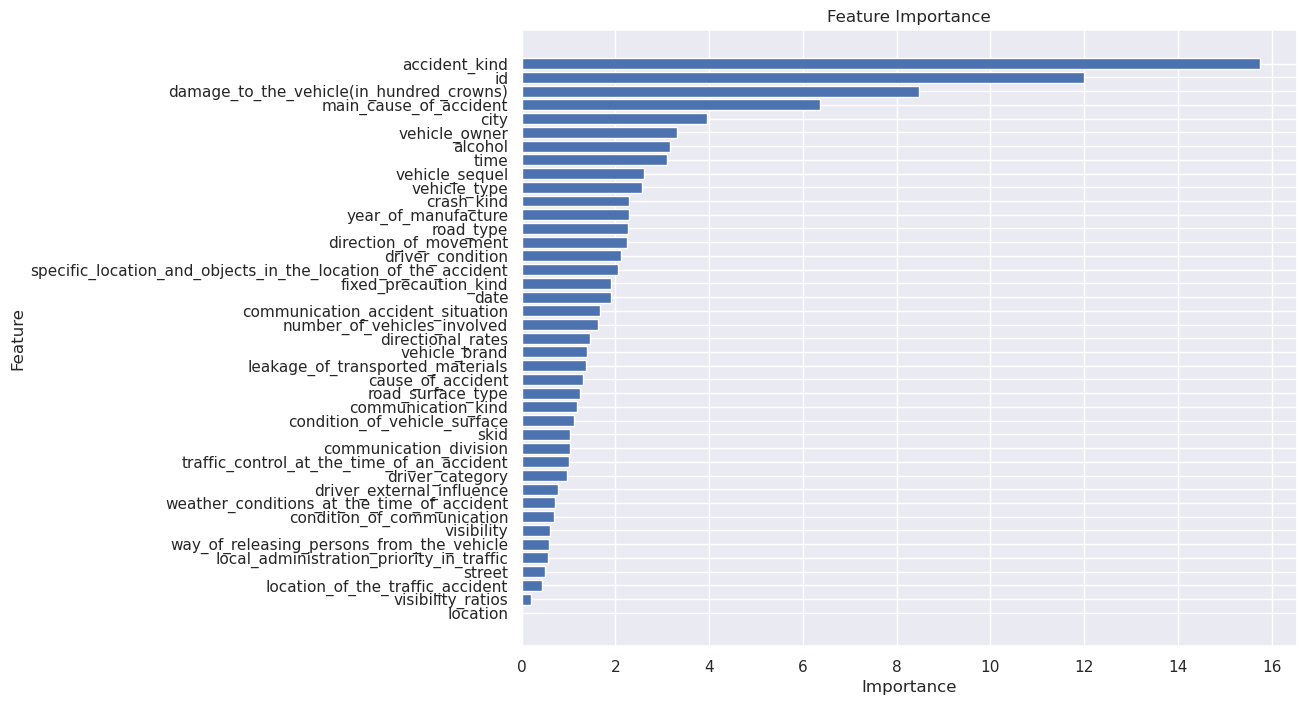

In [147]:
feature_importance = cb.get_feature_importance(prettified=True).sort_values('Importances',ascending=True)
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(feature_importance['Feature Id'], feature_importance['Importances'])
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance')

plt.show();


In [134]:
df.groupby('accident_kind')['injury'].agg(['count','mean']).sort_values('count',ascending=False).head(10)

,count,mean
accident_kind,,
collision with a moving non-rail vehicle,224165,0.286106
"collision with a vehicle parked, parked",153275,0.019501
collision with a fixed obstacle,147434,0.159631
collision with forest animals,92632,0.008377
crashes,37128,0.620314
collision with a pedestrian,21239,0.918311
another type of accident,16832,0.309292
collision with a tram,3849,0.170174
collision with a domestic animal,3144,0.103372


In [135]:
df.groupby('main_cause_of_accident')['injury'].agg(['count','mean']).sort_values('count',ascending=False).head(10)

,count,mean
main_cause_of_accident,,
the driver was not fully engaged in driving the vehicle,117775,0.160059
not caused by the driver,108355,0.076978
incorrect turning or reversing,60030,0.047959
another type of wrong way of driving,57077,0.066384
failure to keep a safe distance behind the vehicle,47726,0.206785
"Failure to adjust speed to road conditions (ice, potholes, mud, wet surfaces, etc.)",42020,0.301594
failure to control the vehicle,39123,0.273369
avoidance without sufficient lateral clearance (clearance),30029,0.040095
"Failure to adapt speed to the technical road conditions (curve, gradient, gradient, road width, etc.)",28509,0.477814


In [136]:
df.groupby('alcohol')['injury'].agg(['count','mean']).sort_values('count',ascending=False).head(10)

,count,mean
alcohol,,
ne,380032,0.296107
not detected,287516,0.050689
yes blood alcohol content 1.5‰ or more,19422,0.412676
yes blood alcohol content between 1.0 ‰ and 1.5 ‰,4692,0.421355
yes blood alcohol content between 0.24 ‰ and 0.5 ‰,2107,0.363550
yes blood alcohol content between 0.5 ‰ and 0.8 ‰,1992,0.382530
Rejected,1847,0.380617
yes blood alcohol content from 0.8‰ to 1.0‰,1428,0.397759
yes blood alcohol content up to 0.24 ‰,1207,0.448219


In [137]:
df.groupby('crash_kind')['injury'].agg(['count','mean']).sort_values('count',ascending=False).head(10)

,count,mean
crash_kind,,
not an option It is not a collision between moving vehicles,471684,0.159781
strabismus,76357,0.237005
Side,66650,0.215724
on the side,64025,0.307474
Front,21973,0.594411


In [138]:
df.groupby('city')['injury'].agg(['count','mean']).sort_values('count',ascending=False).head(10)

,count,mean
city,,
outside the municipality,223339,0.246186
Brno,16894,0.270688
Olomouc,6754,0.185520
Liberec,6346,0.174283
Hradeckrálové,5990,0.172788
Praha4,5571,0.092264
Praha5,5289,0.092834
Praha9,5027,0.091307
Českébudějovice,4658,0.339416


In [139]:
df.groupby('year_of_manufacture')['injury'].agg(['count','mean']).sort_values('count',ascending=False).head(10)

,count,mean
year_of_manufacture,,
-1,153066,0.161597
2016,33639,0.154315
2015,32264,0.157668
2017,30032,0.154469
2008,28443,0.215202
2011,26487,0.193491
2018,26207,0.157363
2007,25498,0.229665
2010,24966,0.199792


In [140]:
df.groupby('year_of_manufacture')['injury'].agg(['count','mean']).query('count > 100').sort_values('mean',ascending=False).head(10)

,count,mean
year_of_manufacture,,
1991,407,0.375921
1992,640,0.362500
1984,136,0.345588
1985,204,0.343137
1988,303,0.333333
1994,1246,0.327448
1986,228,0.324561
1995,2813,0.315677
1993,887,0.315671


In [141]:
df.groupby('driver_category')['injury'].agg(['count','mean']).sort_values('count',ascending=False).head(10)

,count,mean
driver_category,,
with a driving licence of category B,368768,0.227365
with a driving licence of category C,125584,0.189045
"undetected, driver drove off",122674,0.033063
with a driving licence of category D,29348,0.196811
"other vehicle drivers (e.g. cyclists, car drivers, train drivers, etc.)",21816,0.829895
"not detected, the driver left the scene (code 17 for p44 or code 4 for p50a)",20201,0.046483
without a driving licence,7588,0.266869
not detected (e.g. for foreigners),2144,0.304104
with a driving licence of category A,1594,0.760979


In [142]:
df.groupby('road_type')['injury'].agg(['count','mean']).sort_values('count',ascending=False).head(10)

,count,mean
road_type,,
LocalCommunications,278118,0.139168
class 2 roads,108180,0.298734
class 1 roads,99933,0.286902
class 3 roads,92252,0.271452
sledovanacommunications,51071,0.113215
Highways,26205,0.142530
node,24781,0.115290
local roads,7449,0.115854
2nd class roads,3397,0.279070
